## Chapter 1

### 1. Initial Data Analysis

In [5]:
# install.packages('faraway')

In [2]:
require(gridExtra)

Loading required package: gridExtra



In [3]:
require(faraway)

Loading required package: faraway

Warning message:
“package ‘faraway’ was built under R version 4.0.2”


Data:

The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study of 768 adult female Pima Indians living near Phoenix.

Variables: number of times pregnant, plasma pressure(mmHg), triceps skin fold thickness(mm), 2hr serum insulin (mu U/ml), body mass index (weigth in kg/(height in $m^2$), diabetes pedigree function, age(years), and a test whether the patient showed signs of diabetes (coded 0 if negative, 1 if positive)

In [4]:
data(pima, package='faraway')

In [5]:
head(pima)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


The `summary()` command is a quick way to get the usual univariate summary information.
At this stage, we are looking for anything unusual or unexpected, perhaps indicating a data-entry error.
For this purpose, a close look at the minimum and maximum values of each variable is worthwhile.

In [6]:
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           bmi           diabetes           age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
      test      
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 

Starting with `pregnant`, we see a maximum value of 17. This is large, but not impossible.
However, we then see that the next 5 variables have minimum values of zero.
No blood pressure is not good for the health -- something must be wrong.
Let's look at sorted values:

In [7]:
sort(pima$diastolic)

[1]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [19]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  24
 [37]  30  30  38  40  44  44  44  44  46  46  48  48  48  48  48  50  50  50
 [55]  50  50  50  50  50  50  50  50  50  50  52  52  52  52  52  52  52  52
 [73]  52  52  52  54  54  54  54  54  54  54  54  54  54  54  55  55  56  56
 [91]  56  56  56  56  56  56  56  56  56  56  58  58  58  58  58  58  58  58
[109]  58  58  58  58  58  58  58  58  58  58  58  58  58  60  60  60  60  60
[127]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
[145]  60  60  60  60  60  60  60  60  60  60  60  60  60  60  61  62  62  62
[163]  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62
[181]  62  62  62  62  62  62  62  62  62  62  62  62  62  64  64  64  64  64
[199]  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64
[217]  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64
[235]  64  64  65  65  65  65  65  65  65  66  66  66  66  66  66  66  66  66
[253]  66  66  66  66  66  66  66  66  66  66  66  66  66  66  66  66  66  66
[271]  66  66  66  68  68  68  68  68  68  68  68  68  68  68  68  68  68  68
[289]  68  68  68  68  68  68  68  68  68  68  68  68  68  68  68  68  68  68
[307]  68  68  68  68  68  68  68  68  68  68  68  68  70  70  70  70  70  70
[325]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[343]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[361]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  72  72  72
[379]  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
[397]  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
[415]  72  72  72  72  72  74  74  74  74  74  74  74  74  74  74  74  74  74
[433]  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74
[451]  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74
[469]  74  74  74  75  75  75  75  75  75  75  75  76  76  76  76  76  76  76
[487]  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76
[505]  76  76  76  76  76  76  76  76  76  76  76  76  76  76  78  78  78  78
[523]  78  78  78  78  78  78  78  78  78  78  78  78  78  78  78  78  78  78
[541]  78  78  78  78  78  78  78  78  78  78  78  78  78  78  78  78  78  78
[559]  78  78  78  78  78  80  80  80  80  80  80  80  80  80  80  80  80  80
[577]  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80
[595]  80  80  80  80  80  80  80  80  80  82  82  82  82  82  82  82  82  82
[613]  82  82  82  82  82  82  82  82  82  82  82  82  82  82  82  82  82  82
[631]  82  82  82  84  84  84  84  84  84  84  84  84  84  84  84  84  84  84
[649]  84  84  84  84  84  84  84  84  85  85  85  85  85  85  86  86  86  86
[667]  86  86  86  86  86  86  86  86  86  86  86  86  86  86  86  86  86  88
[685]  88  88  88  88  88  88  88  88  88  88  88  88  88  88  88  88  88  88
[703]  88  88  88  88  88  88  90  90  90  90  90  90  90  90  90  90  90  90
[721]  90  90  90  90  90  90  90  90  90  90  92  92  92  92  92  92  92  92
[739]  94  94  94  94  94  94  95  96  96  96  96  98  98  98 100 100 100 102
[757] 104 104 106 106 106 108 108 110 110 110 114 122

We see that the first 35 values are zero, for some reason these patients did not obtain blood pressures

We set all zero values of the five variables to `NA` which is the missing value code used by `R`:

In [8]:
pima$diastolic[pima$diastolic == 0] <- NA
pima$glucose[pima$glucose == 0] <- NA
pima$triceps[pima$triceps == 0] <- NA
pima$insulin[pima$insulin == 0] <- NA
pima$bmi[pima$bmi == 0] <- NA

The variable `test` is not quantitative but categorical. Such variables are called ___factors___


In [9]:
pima$test <- factor(pima$test)
summary(pima$test)

0   1 
500 268

We now see that 500 cases were negative and 268 cases were positive.

Better to use descriptive labels:

In [10]:
levels(pima$test) <- c("negative","positive")
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            bmi           diabetes           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00  
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.

Now that we have cleared mising values, we can see some plots

#### Univariate plots

$Histogram$

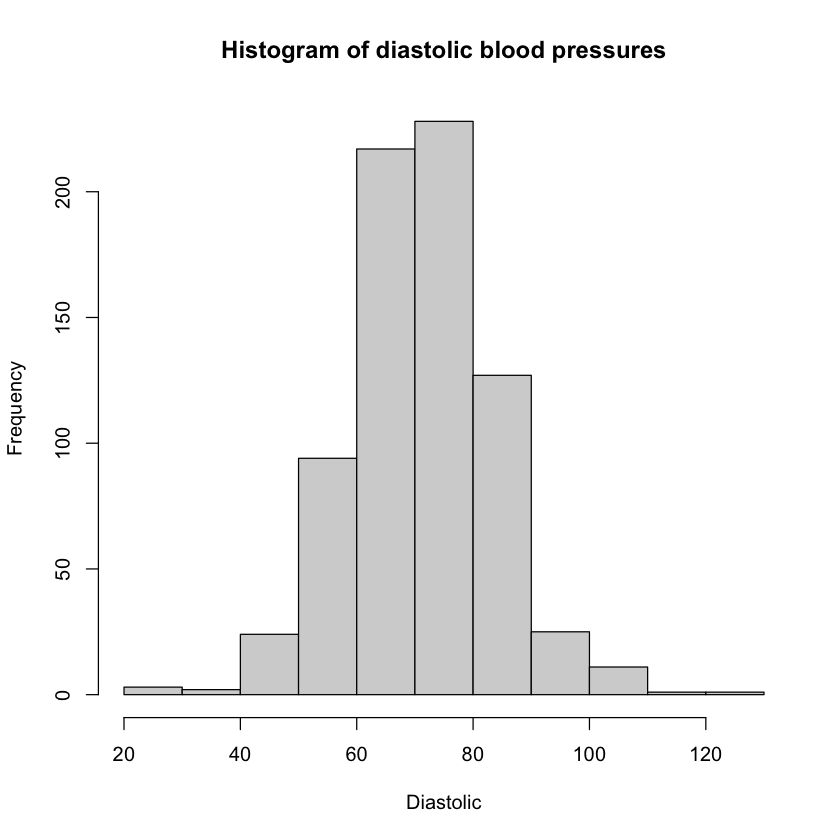

In [21]:
hist(pima$diastolic, xlab="Diastolic", main="Histogram of diastolic blood pressures")

___Kernel  Density___

Smoothed version of the histogram

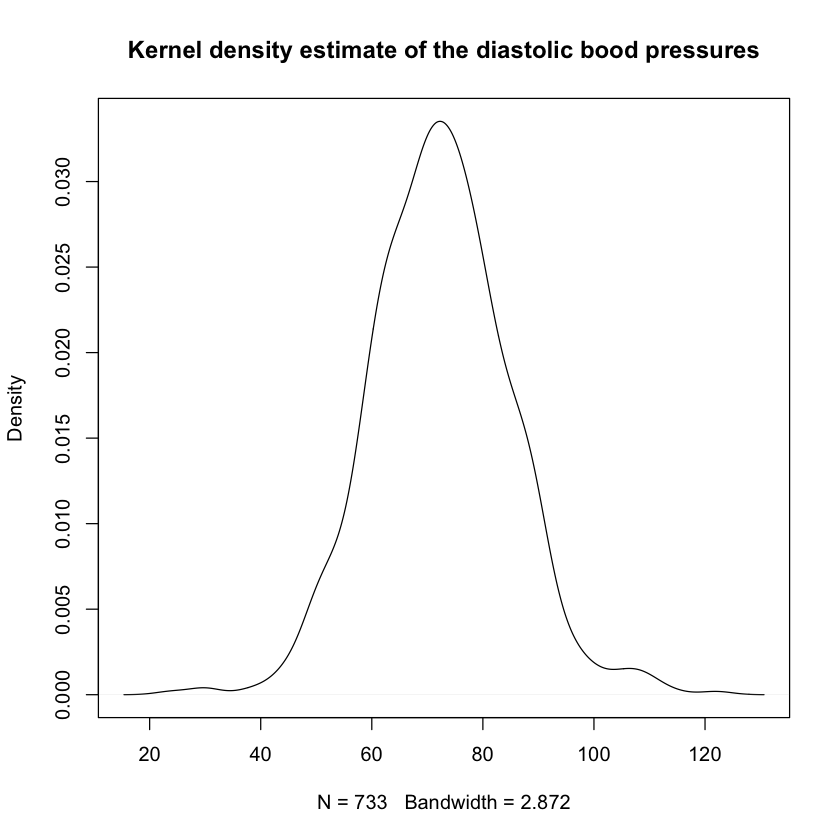

In [20]:
plot(density(pima$diastolic, na.rm=TRUE), main="Kernel density estimate of the diastolic bood pressures")

___Sorted data against index___

Advantage: we can see the data individually. We can the distribution and possible outliers

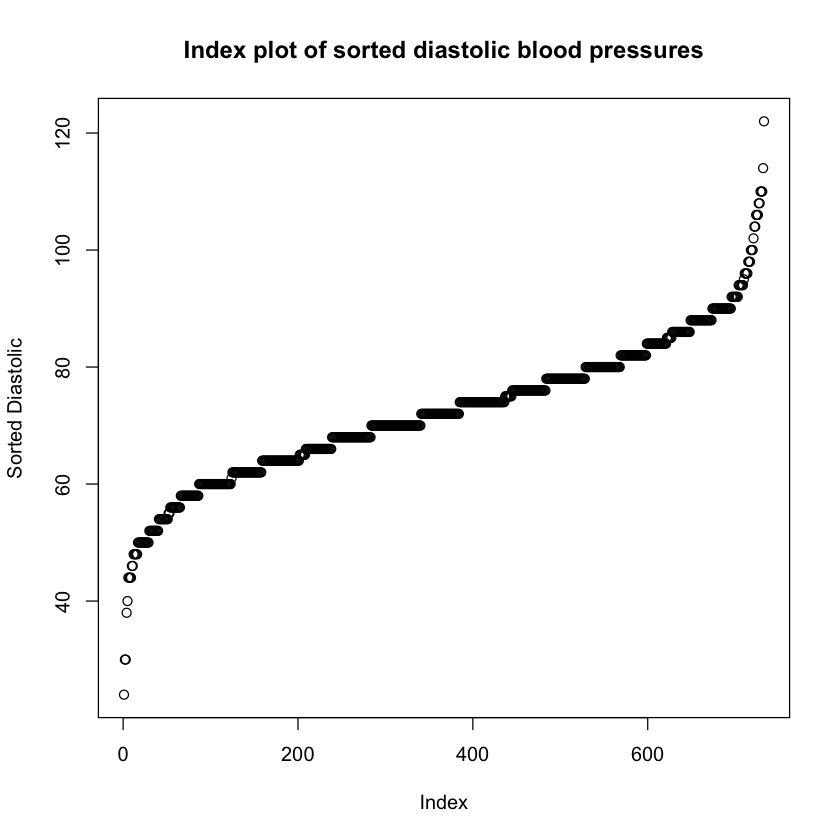

In [23]:
plot(sort(pima$diastolic), ylab="Sorted Diastolic", main="Index plot of sorted diastolic blood pressures")

#### Bivariate plots

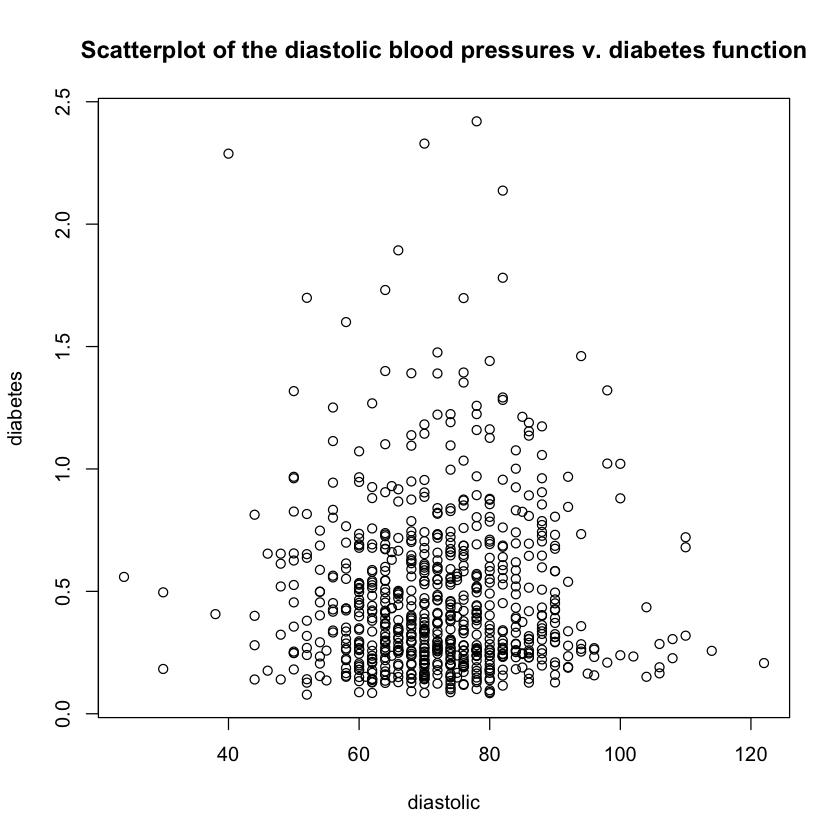

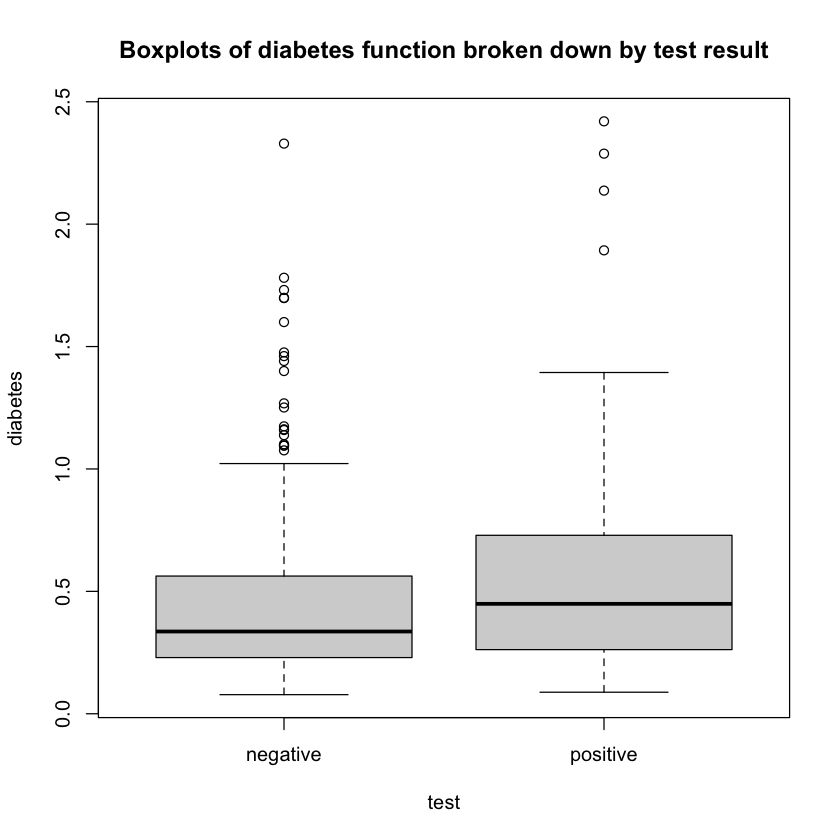

In [25]:
plot(diabetes ~ diastolic,pima, main="Scatterplot of the diastolic blood pressures v. diabetes function")
plot(diabetes ~ test,pima, main="Boxplots of diabetes function broken down by test result")

In [15]:
require(ggplot2)

Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 35 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 35 rows containing non-finite values (stat_density).”
Warning message:
“Removed 35 rows containing missing values (geom_point).”


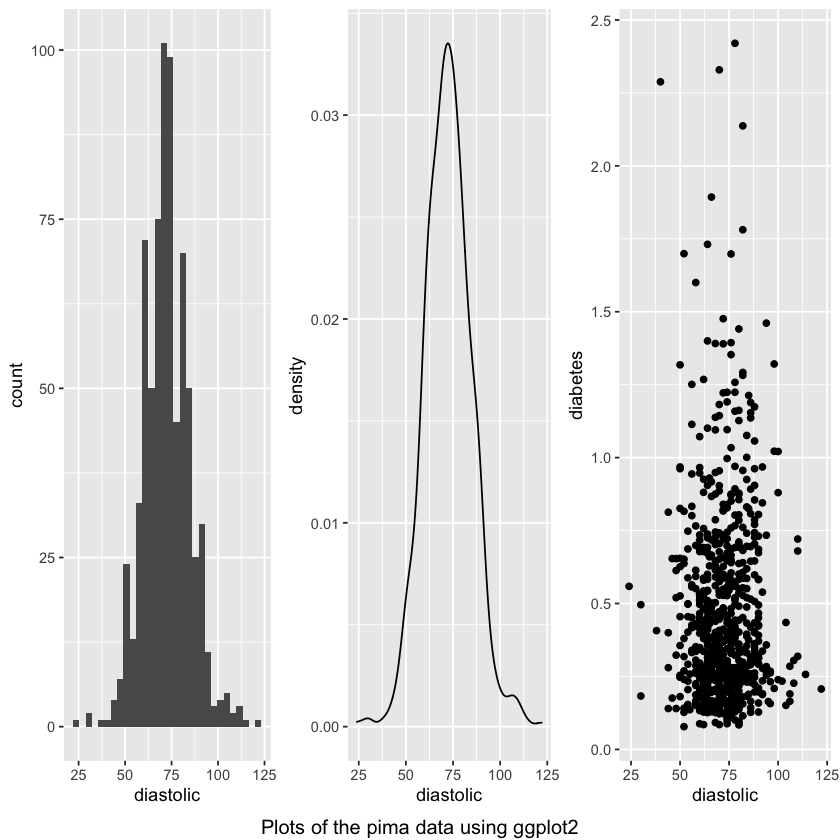

In [32]:
p1 <- ggplot(pima,aes(x=diastolic))+geom_histogram()
p2 <- ggplot(pima,aes(x=diastolic))+geom_density()
p3 <- ggplot(pima,aes(x=diastolic,y=diabetes))+geom_point()

grid.arrange(p1, p2, p3, nrow=1, bottom="Plots of the pima data using ggplot2")

Warning message:
“Removed 35 rows containing missing values (geom_point).”
Warning message:
“Removed 35 rows containing missing values (geom_point).”


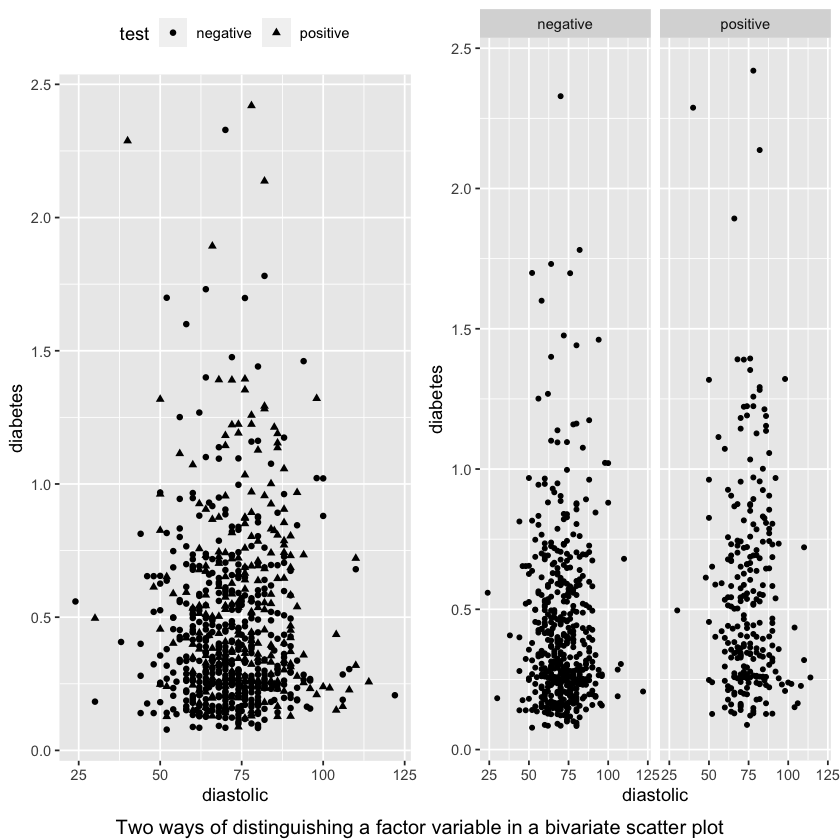

In [17]:
p1 <- ggplot(pima, aes(x=diastolic, y=diabetes, shape=test)) + geom_point() + theme(legend.position='top', legend.direction='horizontal')

p2 <- ggplot(pima, aes(x=diastolic, y=diabetes)) + geom_point(size=1) + facet_grid(~ test)

grid.arrange(p1, p2, nrow=1, 
             bottom="Two ways of distinguishing a factor variable in a bivariate scatter plot")

Good graphics are vital in data analysis. They help you avoid mistakes and suggest the form of the modeling to come.
They are also important in communicating your analysis to others.

### 1.2 When to use Linear Modeling

Linear modeling is used for explaining or modeling the realtionship between a single variable $Y$ called the response nad one or more $predictor$ variables $X_1,...X_p$ where $p$ is the number of predictors.

Regression analyses have two main objectives:
1. Prediction of futire or unseen responses given specified values of the predictors
2. Assessment of the effect of, or relationship between, explanatory varaibles and the response. We would like to infer causal relationships if possible

Regression modeling can also be used in a descriptive manner to summarize the relationships between the variables.

### 1.3 History of Linear Modeling

In the 18<sup>th</sup> century, accurate navigation was a difficult problem of commercial and military interest. Finding longitude was difficult.

Tobias Mayer collected data on the locations of various landmarks on Moon, including the Manilius crater, as they moved relative to the earth to help with navigation.

He derived an equation describing the motion of the moon (called _libration_) taking form:

$$
arc = \beta + \alpha sin(ang) + \gamma cos(ang)
$$

He wished to obtain values for three unknowns $\alpha, \beta$ and $\gamma$

The variables $arc, sin(ang)$ and $cos(ang)$ can be observed using a telescope.
Since there are 3 unknowns, we only need 3 distinct observations to find a unique solution. Embarassingly for Mayer, there were 27 sets of observations avaialble.
Astronomical measurements were naturally subject to some variation and so there was not sultion to fit all 27 observations.

Let's take a look at the first few lines of data:

In [2]:
data(manilius, package="faraway")

In [6]:
manilius

arc,sinang,cosang,group
<dbl>,<dbl>,<dbl>,<int>
13.16667,0.8836,-0.4682,1
13.13333,0.9996,-0.0282,1
13.20000,0.9899,0.1421,1
14.25000,0.2221,0.9750,3
14.70000,0.0006,1.0000,3
13.01667,0.9308,-0.3654,1
14.51667,0.0602,0.9982,3
14.95000,-0.1570,0.9876,2
13.08333,0.9097,-0.4152,1


Mayer's solution was to divide the data into 3 groups so that observations within each group were similar in some respect.
He then computed the sum of the variables within each group. We can also do this:

In [10]:
(moon3 <- aggregate(manilius[,1:3], list(manilius$group), sum))

Group.1,arc,sinang,cosang
<int>,<dbl>,<dbl>,<dbl>
1,118.1333,8.4987,-0.7932
2,140.2833,-6.1404,1.7443
3,127.5333,2.9777,7.9649


Now there are just 3 equations and 3 unknows to be solved. The solution is:

In [8]:
solve(cbind(9, moon3$sinang, moon3$cosang), moon3$arc)

[1] 14.5445859 -1.4898221  0.1341264

Hence the computed values of $\alpha, \beta$ and $\gamma$ are $-1.49, 14.5$ and $0.134$ respectively.

Similar problems with more linear equations than unknowns continued to arise until 1805, when Adrien Marie Legendre published the method of least squares.
Suppose we recognize that the equation is not exact and introduce an error term $\epsilon$

$$
arc_i = \beta + \alpha sin(ang)_i + \gamma cos(ang)_i + \epsilon_i
$$

where $i = 1,...,27$



Now we find $\alpha, \beta$ and $\gamma$ that minimize the sum of the squared errors: $\sum \epsilon^2$

In [13]:
lmod <- lm(arc ~ sinang + cosang, manilius)

In [14]:
coef(lmod)

(Intercept)      sinang      cosang 
14.56162351 -1.50458123  0.09136504

We observe that the solution is very similar to Mayer's.

The least sqaures. solution os more satisfactory in that it requires no arbitrary division into groups. Carl Friedrich Gauss claimed to have devised the method of least squares earlier but without publishing it.

Francis Galton, a nephew of Charles Darwin was important in this extension of statistics into social sciences.
He coinded the term _regression to mediocrity_ in 1875 from which the rather peculiar term _regression_ derives. 

In [15]:
# install.packages("HistData")


The downloaded binary packages are in
	/var/folders/cq/y3_cbnq901lb9q9m0c1pm25c0000gp/T//RtmpUki8kR/downloaded_packages


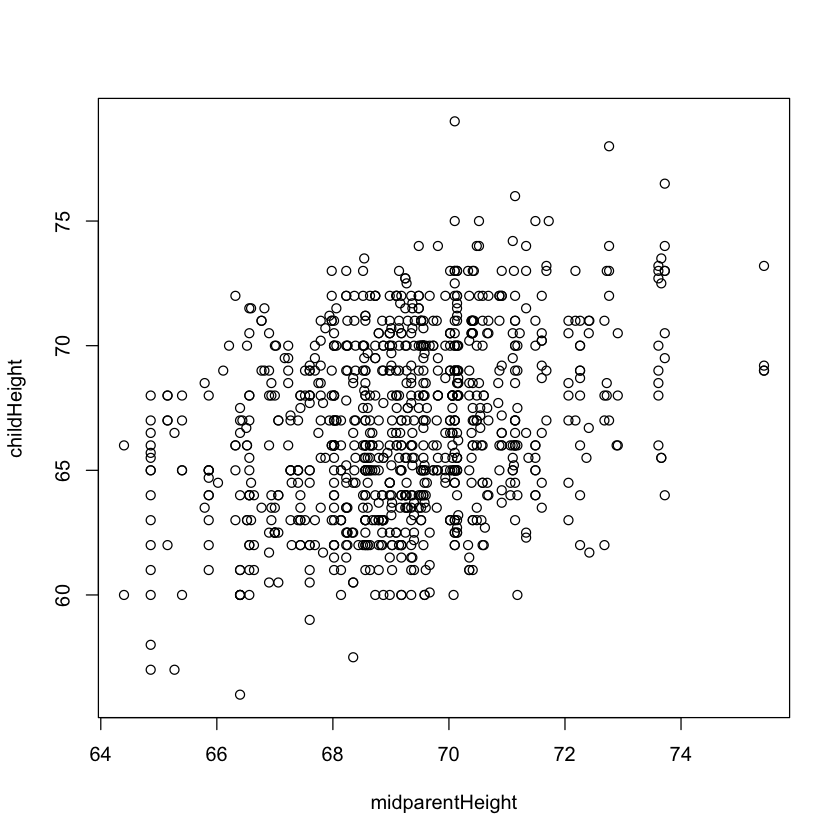

In [34]:
data(GaltonFamilies, package="HistData")
plot(childHeight ~ midparentHeight, GaltonFamilies)

The height of child is plotted against a combined parental height defined as (father's height + 1.08 x mother's height)/2

We might propose a linear relationship between the two of the form:

$$
childHeight = \alpha + \beta midparentHeight + \epsilon
$$

We can estimate $\alpha$ and $\beta$ using R and plot the resukting fit as follows:

In [26]:
lmod <- lm(childHeight ~ midparentHeight, GaltonFamilies)

In [27]:
coef(lmod)

(Intercept) midparentHeight 
     22.6362405       0.6373609

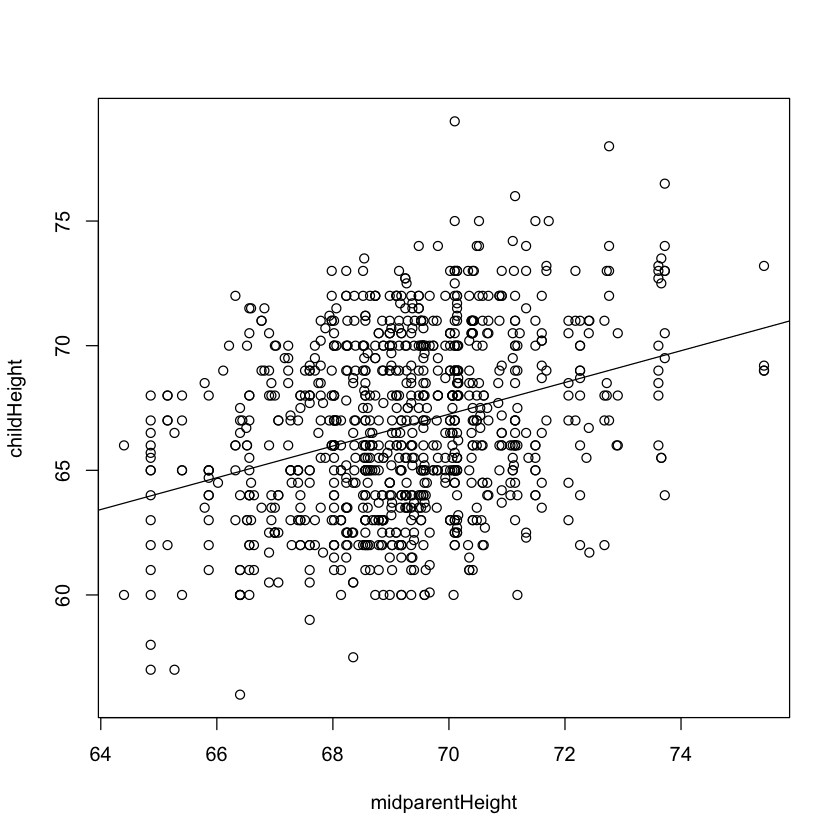

In [35]:
plot(childHeight ~ midparentHeight, GaltonFamilies)
abline(lmod)

For the simple case of response $y$ and a single predictor $x$, we can write the equation in the form:

$$
\frac{y-\hat{y}}{SD_y} = r \frac{x-\hat{x}}{SD_x}
$$

where $r$ is the correlation between $x$ and $y$.

We can verify that this produces the same results as above by rearranging the equation in the form $y = \alpha + \beta x$ and computing the estimates:

In [32]:
(beta <- with(GaltonFamilies, cor(midparentHeight, childHeight) * sd(childHeight) / sd(midparentHeight)))

[1] 0.6373609

In [33]:
(alpha <- with(GaltonFamilies, mean(childHeight) - beta * mean(midparentHeight)))

[1] 22.63624

One might expect that a child with parents who are one SD above average in height, to also be one SD above average in height, give or take.
The supposition would set $r = 1$ in the equation and leads to line which we compute and plot below:

In [37]:
(beta1 <- with(GaltonFamilies, sd(childHeight) / sd(midparentHeight)))

[1] 1.985858

In [38]:
(alpha1 <- with(GaltonFamilies, mean(childHeight) - beta1 * mean(midparentHeight)))

[1] -70.68889

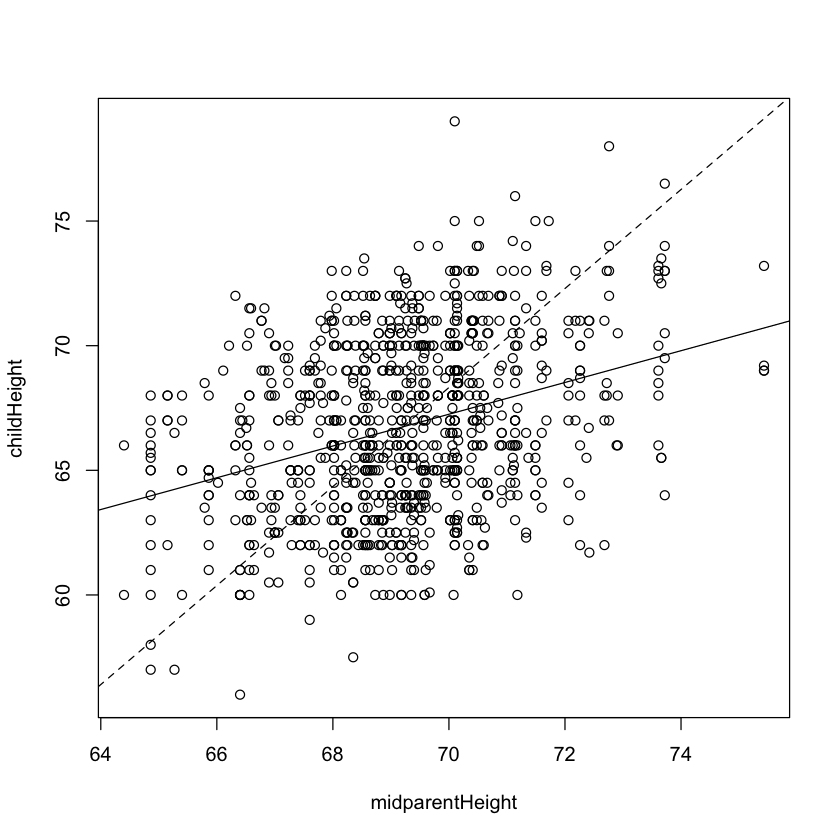

In [40]:
plot(childHeight ~ midparentHeight, GaltonFamilies)
abline(lmod)
abline(alpha1, beta1, lty=2)

The lines cross at the point of the average. We can say that a child of tall parents is predicted by the least sqaures line to have height which is above average but not quite as tall as the parents as the dashed line would have you believe.

Similarly children of below average height parents are predicted to have a height which is still below average but not quite as short as parents.

This is why Galton used the phrase __"regression to mediocrity"__ and the phenomenom is sometimes called the regression effect.

This applies to any $(x,y)$ situation like this. For example, in sports an athlete may have a spectacular first season only to do not quite as well in the second season.